# Fundamentals of Data Analysis Project

**by Declan Fox**

## Fisher’s Iris Data Set

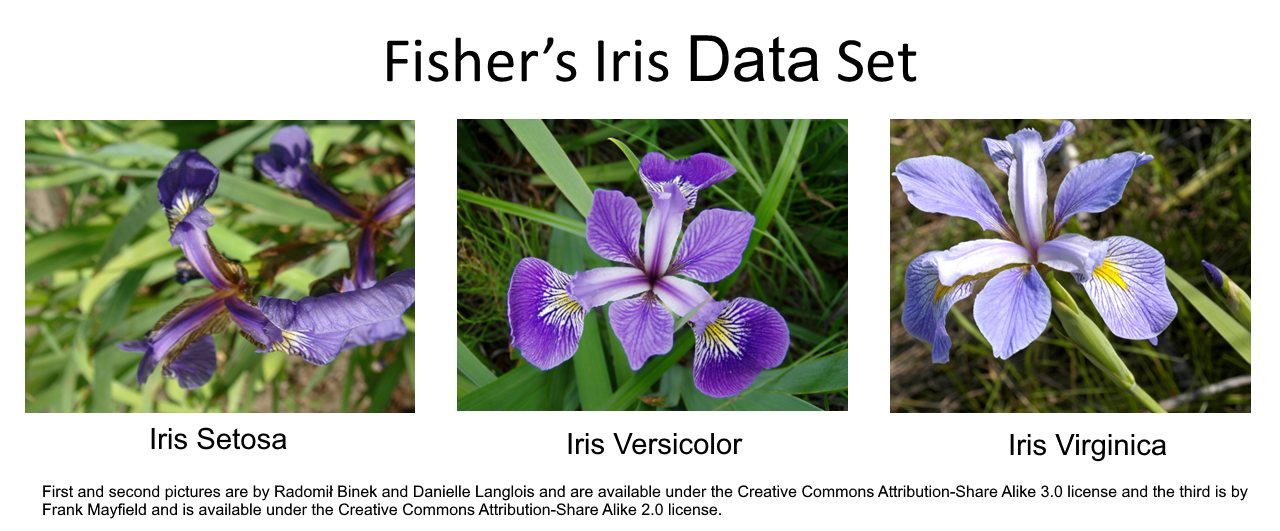

Fisher’s Iris Data Set is based on data collected by Edgar Anderson from three species of irises in the Gaspé Peninsula in Quebec, Canada. This Data set has been used countless times in statistics papers since they were first used by R. A. Fisher in 1936 to introduce the method of discriminant analysis. The dataset is made up of five variables, the first four of which are measurements of Sepal Length, Sepal Width, Petal Length and Petal Width, and a fifth variable which denotes which species of iris, Iris Setosa,Iris Versicolour, and Iris Virginca[1]. There are 50 samples for each species for a total of 150 samples. Fishers aim was to classify the species based on the different measurements in the dataset and since the advent of machine learning this dataset has become a benchmark for testing algorithms.

**Sepals,** In most flowering plants sepals are usually the green leaf like structures that enclose the flower in the bud and open up to support the petals when it blooms. While Botanists disagree as to whether Irises have Sepals or not[2], for the purposes of this project, we will, as Anderson and Fisher have done, count the larger petal-like parts of the flower as sepals.

##### Capturing and saving the dataset
***

#### Import the following libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io
from urllib.request import urlopen



#### Download the dataset from UC Irvine
As the .zip file linked in the assessment instructions contains several files the following step will be used to download just the iris.data dataset and create a pandas data frame from it. These steps can also be used for the bezdekIris.data dataset if required.
1. open the URl with urllib.request[3].
2. extract the dataset from the .zip file with zipfile[4].
3. use the pandas read_csv method to read the dataset and create a dataframe from it[5].
4. add column labels to the dataframe[6].

In [2]:
r = urlopen('http://archive.ics.uci.edu/static/public/53/iris.zip').read()
file = ZipFile(io.BytesIO(r))
df = pd.read_csv(file.open("iris.data"), header = None)
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species' ]

#### Classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.
***

##### Sepal Length (Numerical - Continuous)
**Type:** Quantitative / Float\
**Scale of Measurement:** Ratio\
**Description:** Length of the iris flower's sepals in centimeters. It is a continuous variable with a ratio scale, as it has a true zero point, and the differences between values are measurable[7].

##### Sepal Width (Numerical - Continuous)
**Type:** Quantitative / Float\
**Scale of Measurement:** Ratio\
**Description:** The width of the iris flower's sepals in centimeters. Like sepal length, it is a continuous variable with a ratio scale[7].

##### Petal Length (Numerical - Continuous)
**Type:** Quantitative / Float\
**Scale of Measurement:** Ratio\
**Description:** The length of the iris flower's petals (the inner segments) in centimeters. It is a continuous variable with a ratio scale[7].

##### Petal Width (Numerical - Continuous)
**Type:** Quantitative / float\
**Scale of Measurement:** Ratio\
**Description:** The width of the iris flower's petals in centimeters. Similar to petal length, it is a continuous variable with a ratio scale[7].

##### Species (Categorical - Nominal)
**Type:** Qualitative / string\
**Scale of Measurement:** Nominal\
**Description:** The categorical variable indicating the species of the iris flower. The three possible values are setosa, versicolor, and virginica. This variable is qualitative and nominal, meaning there is no inherent order or ranking among the categories[7].



#### Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
***

##### Sepal Length, Sepal Width, Petal Length, Petal Width (Numerical Variables):

**Mean (Average):** The average value of the variable. It gives you an idea of the central tendency[8][9].

**Standard Deviation:** Measures the spread of the values around the mean. A higher standard deviation indicates more variability[8][9].

**Minimum and Maximum:** The range of values. Helpful for understanding the overall spread of the data[8][9].

**Quartiles (25th, 50th - Median, 75th):** Provide information about the distribution and identify potential outliers[8][9].

In [3]:
# Calculate summary statistics for numerical variables
summary_stats_numeric = df.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(summary_stats_numeric)


      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.054000           3.758667          1.198667
std            0.828066          0.433594           1.764420          0.763161
min            4.300000          2.000000           1.000000          0.100000
25%            5.100000          2.800000           1.600000          0.300000
50%            5.800000          3.000000           4.350000          1.300000
75%            6.400000          3.300000           5.100000          1.800000
max            7.900000          4.400000           6.900000          2.500000


##### Species (Categorical Variable):

**Count:** The number of occurrences of each category[9].

**Unique:** The number of distinct categories[9].

**Top:** The most frequently occurring category[9].

**Frequency:** The count of the top category[9].

In [4]:
# Calculate summary statistics for the categorical variable
summary_stats_categorical = df['Species'].describe()
print(summary_stats_categorical)


count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object


#### Select, demonstrate, and explain the most appropriate plot(s) for each variable.
***

##### Histograms (Numerical Variables - Sepal Length, Sepal Width, Petal Length, Petal Width):

**Purpose:** Show the distribution of numerical variables.\
**Explanation:** Histograms provide a visual representation of the frequency distribution of a continuous variable. You can observe patterns such as skewness, central tendency, and spread[10].

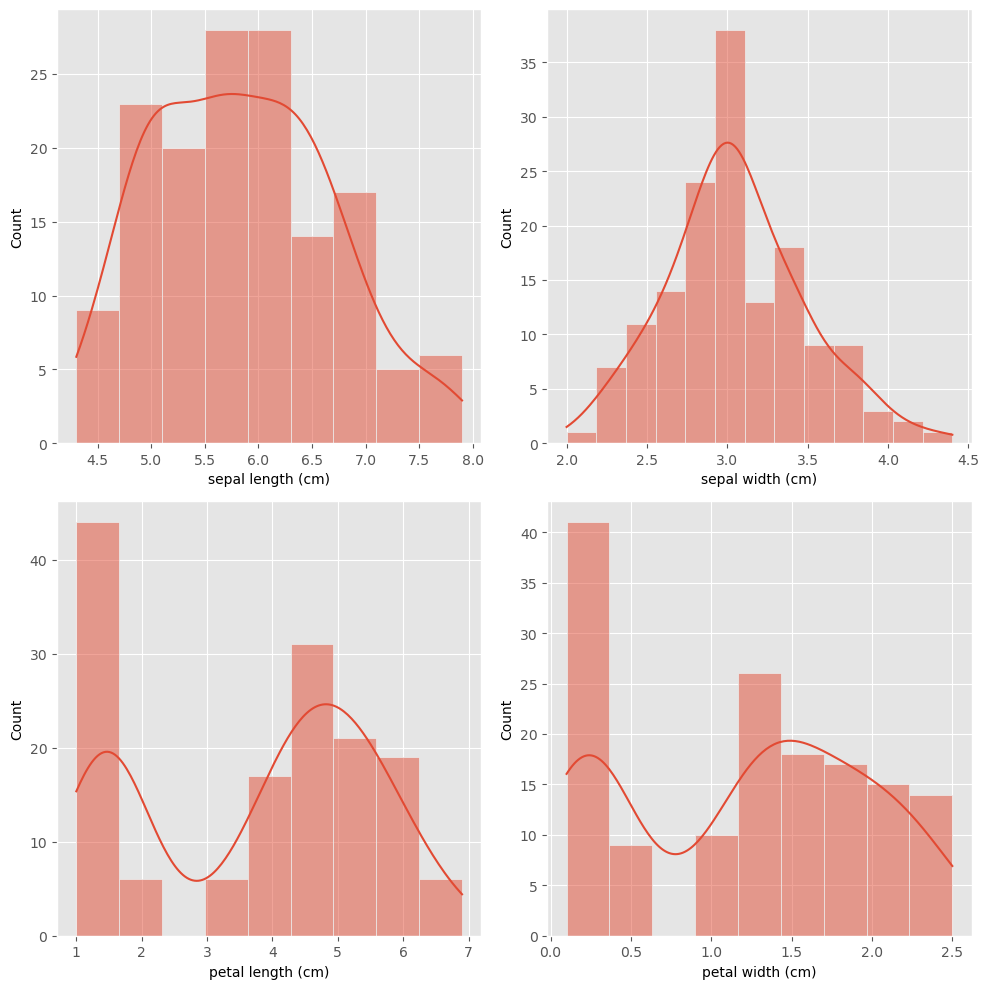

In [5]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2,  figsize=(10, 10))

sns.histplot(x = 'sepal length (cm)', data = df, kde=True, label = 'Sepal Length', ax=ax)
sns.histplot(x = 'sepal width (cm)', data = df, kde=True, label = 'Sepal Width', ax=ax1)
sns.histplot(x = 'petal length (cm)', data = df, kde=True, label = 'Petal Length', ax=ax2)
sns.histplot(x = 'petal width (cm)', data = df, kde=True, label = 'Petal Width', ax=ax3)

plt.tight_layout()
plt.show()


##### Box Plots (Numerical Variables - Sepal Length, Sepal Width, Petal Length, Petal Width):

**Purpose:** Visualize the distribution and identify outliers.\
**Explanation:** Box plots show the median, quartiles, and potential outliers in a compact form. They are helpful for comparing the distribution of different variables[11][12].

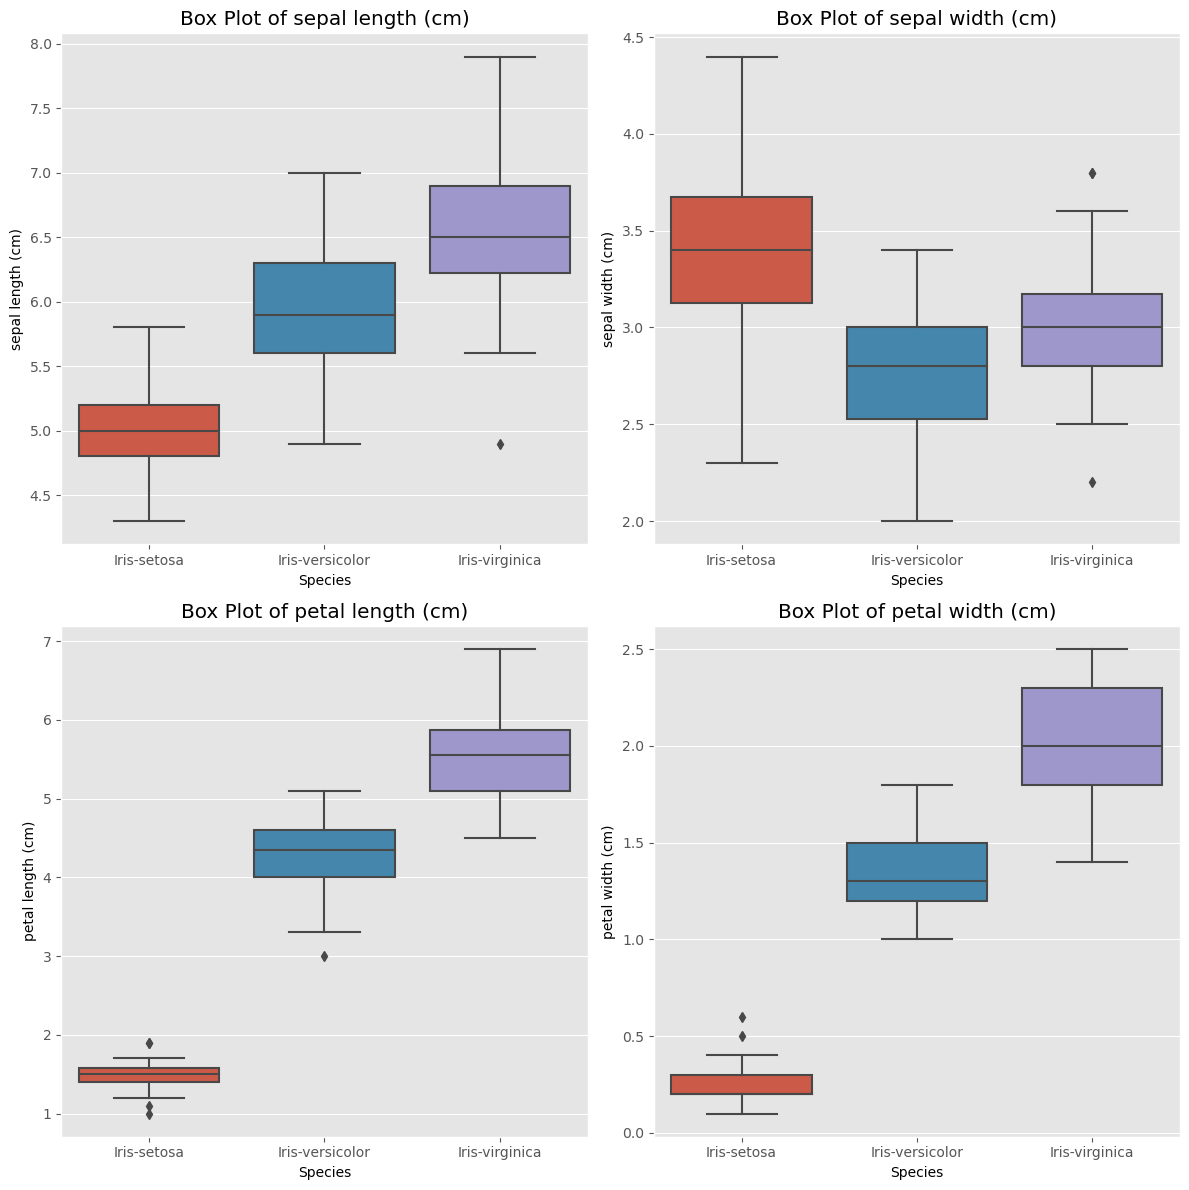

In [6]:
# Plot box plots for numerical variables
plt.figure(figsize=(12,12))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


##### Countplot (Categorical Variable - Species):
**Purpose:** Show the distribution of a categorical variable.\
**Explanation:** Countplots display the count of each category, allowing you to see the distribution of the categorical variable.

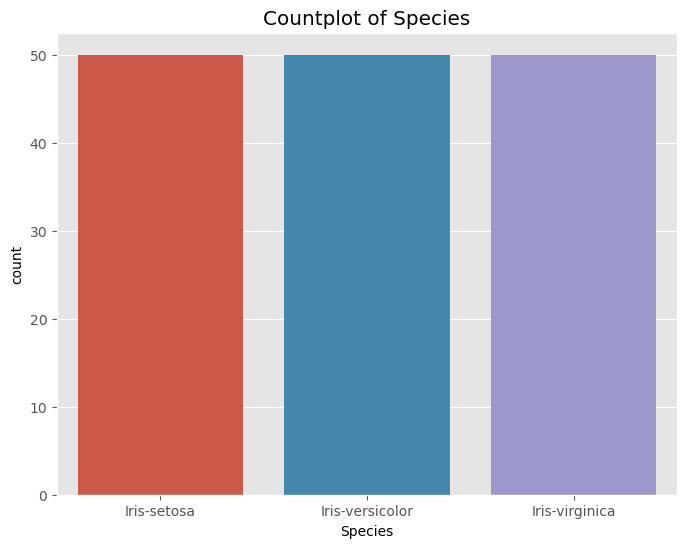

In [7]:
# Plot countplot for the categorical variable (Species)
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Countplot of Species')
plt.show()


##### Pair plot:
**Purpose:** Show the distribution of a single variable and the relationship between any two variables.\
**Explanation:** Pair plots display a grid of plots so that each variable in the data will by shared across the y-axes across a single row and the x-axes across a single column. However the diagonal plots show a distribution of the data in each column[13][14].


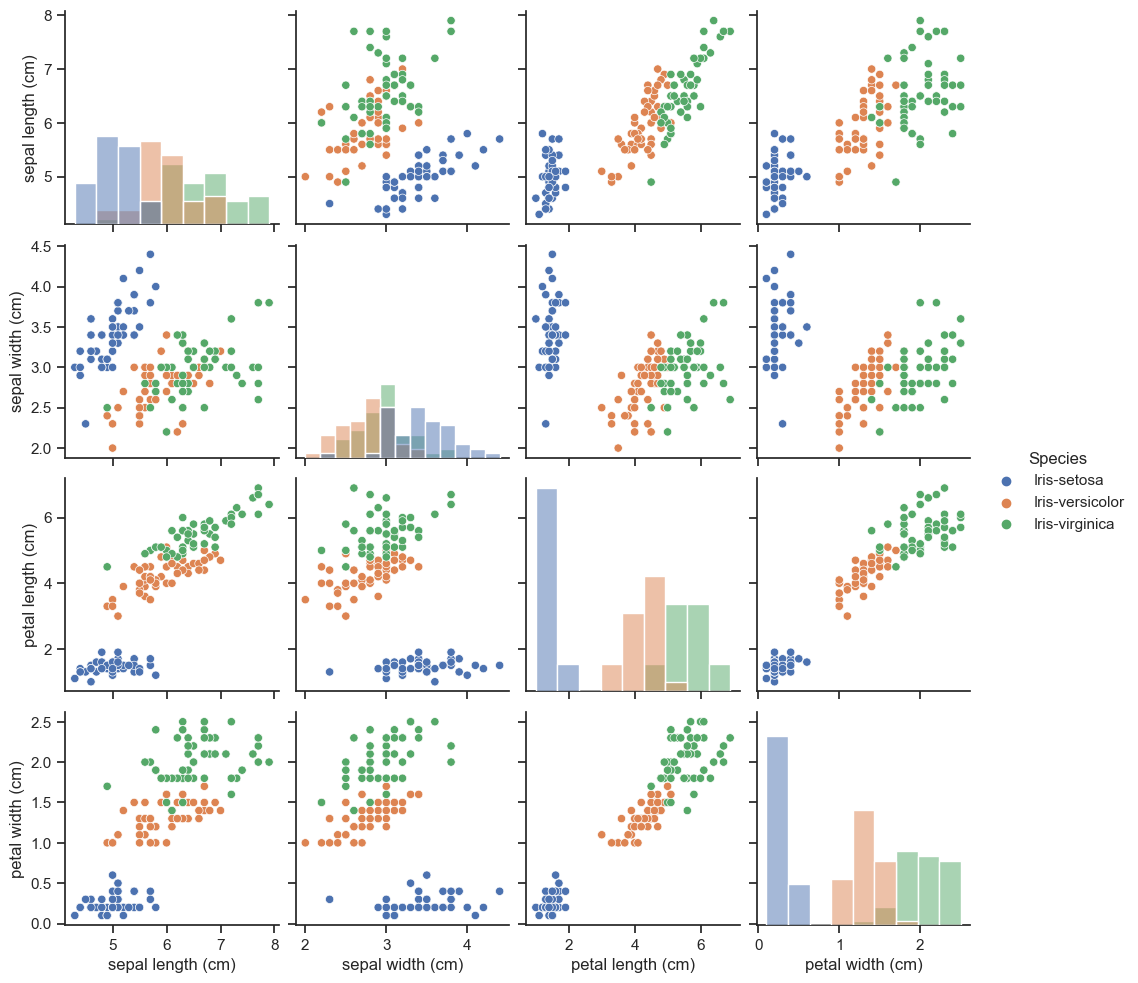

In [8]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Species", diag_kind='hist')

##### Heatmap:
**Purpose:** give a better understanding of the distribution of values for each measurement\
**Explanation:** Each value for the data is represented by a different colour[15]

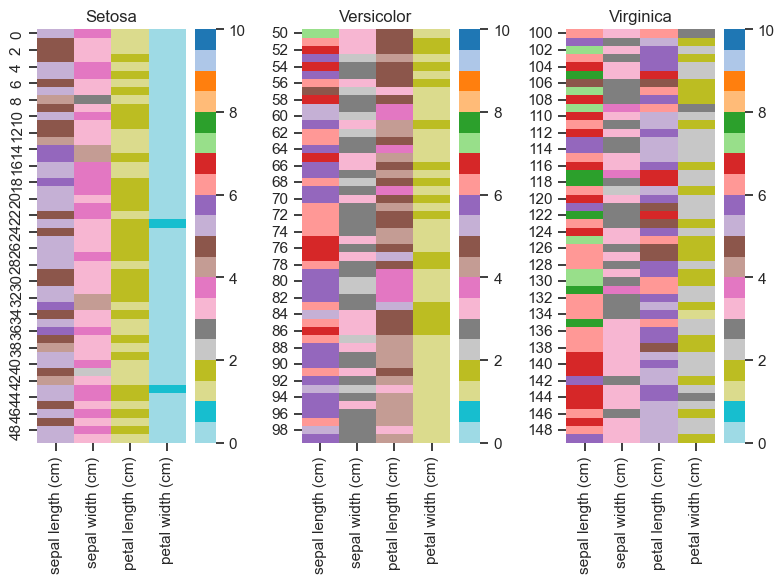

In [9]:
#split out species    
    
df1 = df[0:50]
df2 = df[50:100]
df3 = df[100:150]

# Plot Heat Map

df1_data_cols = df1.drop('Species', axis=1)
df2_data_cols = df2.drop('Species', axis=1)
df3_data_cols = df3.drop('Species', axis=1)

fig, ((ax, ax1, ax2)) = plt.subplots(ncols=3, nrows=1,  figsize=(8, 6))

sns.heatmap(df1_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax)
ax.set_title('Setosa')
plt.tight_layout()

sns.heatmap(df2_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax1)
ax1.set_title('Versicolor')
plt.tight_layout()

sns.heatmap(df3_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax2)
ax2.set_title('Virginica')
plt.tight_layout()

plt.show()


## References
***

[1] *Multivariate linear models in R*, Fox, John, and Sanford Weisberg, An R Companion to Applied Regression. Los Angeles: Thousand Oaks (2011).

[2] *What should we know about the famous Iris data*, Kozak, Marcin, and Barbara Łotocka. https://currentscience.ac.in/Volumes/104/05/0579.pdf

[3] *urllib.request — Extensible library for opening URLs*, Python.org, https://docs.python.org/3/library/urllib.request.html

[4] *zipfile — Work with ZIP archives*, Python.org, https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.open

[5] *pandas.read_csv*,  pandas, https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

[6] *The pandas DataFrame: Make Working With Data Delightful*, Real Python, https://realpython.com/pandas-dataframe/#inserting-and-deleting-columns

[7] *Ratio Scale: Definition, Characteristics & Examples*, Jared Cornell, https://www.proprofssurvey.com/blog/ratio-scale/

[8] *Summarising Data*, Data Analytics.org.uk, https://www.dataanalytics.org.uk/data-analytics-knowledge-base-tips-tricks-r-excel/statistics-guide/data-summary

[9] *How to calculate summary statistics*, Pandas, https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

[10] *Python Histogram Plotting: NumPy, Matplotlib, pandas & Seaborn*, Real Python, https://realpython.com/python-histograms/

[11] *Box Plots*, Real Python, https://realpython.com/python-statistics/#box-plots

[12] *Box Plot (Box and Whiskers): How to Read One & How to Make One in Excel*,  Statistics How To, https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/

[13] *seaborn.pairplot*, Michael Waskom, https://seaborn.pydata.org/generated/seaborn.pairplot.html

[14] *Plotting pairwise relationships in a dataset*, Christoph Pahmeyer, https://observablehq.com/@chrispahm/plotting-pairwise-relationships-in-a-dataset

[15] *Seaborn heatmap: A Complete Guide*, datagy.io, https://datagy.io/seaborn-heatmap/




***
## End